Customer DeliveryTime Prediction

Lifecycle of ML Project
* Understand th problem
* Data Collection
* Data Checks to perform
* EDA
* Data Pre-Processing
* Model Training
* Best model selection


1. Problem Statement
Predict delivery times for food orders to improve customer satisfaction and optimize delivery operations.

2. Data Collection

About Dataset
Food delivery is a courier service in which a restaurant, store, or independent food-delivery company delivers food to a customer. An order is typically made either through a restaurant or grocer's website or mobile app, or through a food ordering company. The delivered items can include entrees, sides, drinks, desserts, or grocery items and are typically delivered in boxes or bags. The delivery person will normally drive a car, but in bigger cities where homes and restaurants are closer together, they may use bikes or motorized scooters.

* Dataset source: https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset?select=train.csv 
* The datasets consist of 20 columns and 45593 rows


2.1 Import Data and Required Packages


In [110]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic


In [111]:
df = pd.read_csv('data/food_delivery.csv')

In [112]:
df.drop('ID',axis=1,inplace=True)

In [113]:
df.shape

(45593, 19)

In [114]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


2.2 Dataset Information
 1   Delivery_person_ID          
 2   Delivery_person_Age          
 3   Delivery_person_Ratings    
 4   Restaurant_latitude        
 5   Restaurant_longitude  
 6   Delivery_location_latitude   
 7   Delivery_location_longitude  
 8   Order_Date                   
 9   Time_Orderd              
 10  Time_Order_picked            
 11  Weatherconditions           
 12  Road_traffic_density         
 13  Vehicle_condition              
 14  Type_of_order              
 15  Type_of_vehicle             
 16  multiple_deliveries         
 17  Festival                     
 18  City                         
 19  Time_taken(min)              

3. Data Checks to perform

Check Missing values
Check Duplicates
Check data type
Check the number of unique values of each column
Check statistics of data set
Check various categories present in the different categorical column

3.1 Check Missing values

In [ ]:
df.isna().sum()

There are no missing values in dataset

In [116]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the data set


3.3 Check data types

In [117]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           45593 non-null  object 
 1   Delivery_person_Age          45593 non-null  object 
 2   Delivery_person_Ratings      45593 non-null  object 
 3   Restaurant_latitude          45593 non-null  float64
 4   Restaurant_longitude         45593 non-null  float64
 5   Delivery_location_latitude   45593 non-null  float64
 6   Delivery_location_longitude  45593 non-null  float64
 7   Order_Date                   45593 non-null  object 
 8   Time_Orderd                  45593 non-null  object 
 9   Time_Order_picked            45593 non-null  object 
 10  Weatherconditions            45593 non-null  object 
 11  Road_traffic_density         45593 non-null  object 
 12  Vehicle_condition            45593 non-null  int64  
 13  Type_of_order   

In [224]:
df.isnull().sum()

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

As we see above we have bunch of null, Nan values . we will clean them step by step depending columns dataypes

In [118]:
print('Unique Ratings:', df['Delivery_person_Ratings'].unique())
print('Unique Age:', df['Delivery_person_Age'].unique())
print('Unique multiple deliveries: ', df['multiple_deliveries'].unique())
print('Unique cities:', df['City'].unique())
print('Unique Weather info :' , df['Weatherconditions'].unique())
print('Unique Road_traffic_density :' , df['Road_traffic_density'].unique())
print('Unique Festival :' , df['Festival'].unique())
print('Unique Deliveries :' , df['multiple_deliveries'].unique())


Unique Ratings: ['4.9' '4.5' '4.4' '4.7' '4.6' '4.8' '4.2' '4.3' '4' '4.1' '5' '3.5'
 'NaN ' '3.8' '3.9' '3.7' '2.6' '2.5' '3.6' '3.1' '2.7' '1' '3.2' '3.3'
 '6' '3.4' '2.8' '2.9' '3']
Unique Age: ['37' '34' '23' '38' '32' '22' '33' '35' '36' '21' '24' '29' '25' '31'
 '27' '26' '20' 'NaN ' '28' '39' '30' '15' '50']
Unique multiple deliveries:  ['0' '1' '3' 'NaN ' '2']
Unique cities: ['Urban ' 'Metropolitian ' 'Semi-Urban ' 'NaN ']
Unique Weather info : ['conditions Sunny' 'conditions Stormy' 'conditions Sandstorms'
 'conditions Cloudy' 'conditions Fog' 'conditions Windy' 'conditions NaN']
Unique Road_traffic_density : ['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']
Unique Festival : ['No ' 'Yes ' 'NaN ']
Unique Deliveries : ['0' '1' '3' 'NaN ' '2']


In [99]:
df.head(100)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SURRES16DEL01,25,5,21.160437,72.774209,21.270437,72.884209,18-03-2022,20:25:00,20:40:00,conditions Stormy,Jam,1,Meal,motorcycle,NaN,No,Metropolitian,(min) 15
96,MYSRES16DEL02,29,5,12.316967,76.603067,12.366967,76.653067,01-04-2022,22:20:00,22:25:00,conditions Sunny,Low,0,Drinks,motorcycle,0,No,Metropolitian,(min) 18
97,MUMRES05DEL03,36,4.7,18.927584,72.832585,19.017584,72.922585,04-04-2022,23:40:00,23:50:00,conditions Sandstorms,Low,2,Drinks,electric_scooter,0,No,Metropolitian,(min) 29
98,COIMBRES19DEL02,33,4.7,11.022298,76.998349,11.072298,77.048349,11-03-2022,23:25:00,23:30:00,conditions Fog,Low,0,Snack,motorcycle,0,No,Metropolitian,(min) 20


In [119]:
# Nan values filled with Ratings 
df['Delivery_person_Ratings'] =  df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].mode()[0])
df['Delivery_person_Ratings'] =  df['Delivery_person_Ratings'].astype('float64')

In [120]:
# Delivery_person_Age , replace Nan values with mean value of Age
df['Delivery_person_Age'] = df['Delivery_person_Age'].replace('NaN', np.nan)
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mean())

In [121]:
df['City'] = df['City'].replace(r'^\s*$', np.nan, regex=True)
df['City'] = df['City'].replace('', np.nan)

city_mode = df['City'].mode()[0]
print(city_mode)
df['City'] = df['City'].fillna(city_mode)

Metropolitian 


In [122]:
df['City'] = df['City'].replace('NaN ','Metropolitian ')
df.City.unique()

In [ ]:
df['multiple_deliveries'] = df['multiple_deliveries'].replace(r'^\s*$', np.nan, regex=True)
df['multiple_deliveries'] = df['multiple_deliveries'].replace('', np.nan)
df['multiple_deliveries'] = df['multiple_deliveries'].astype('Int64')

multiple_deliveries_mode = df['multiple_deliveries'].mode()[0]
print(multiple_deliveries_mode)
df['multiple_deliveries'] = df['multiple_deliveries'].fillna(multiple_deliveries_mode)

df['multiple_deliveries'].unique()

1


<IntegerArray>
[0, 1, 3, 2]
Length: 4, dtype: Int64

In [129]:
df['multiple_deliveries'] = df['multiple_deliveries'].replace('NaN ','1 ')

df['multiple_deliveries'].unique()

<IntegerArray>
[0, 1, 3, 2]
Length: 4, dtype: Int64

In [135]:
df['Weatherconditions']=df['Weatherconditions'].fillna(df['Weatherconditions'].mode()[0])
df['Weatherconditions'] = df['Weatherconditions'].str.replace('conditions ', '')
df['Weatherconditions'].unique()
df = df.rename(columns={'Weatherconditions': 'Weather_Conditions'})

In [139]:
festival_mode = df['Festival'].mode()
print(festival_mode)
df['Festival'] = df['Festival'].fillna(festival_mode)
df['Festival'] = df['Festival'].replace('NaN ', 'No ')
df['Festival'].unique()

0    No 
Name: Festival, dtype: object


array(['No ', 'Yes '], dtype=object)

In [140]:
print(df['Road_traffic_density'].unique())

#df['Road_traffic_density']=df['Road_traffic_density'].fillna(df.Road_traffic_density.mode()[0])

['High ' 'Jam ' 'Low ' 'Medium ' 'NaN ']


In [30]:
df['Time_Orderd']=df['Time_Orderd'].fillna(df.Time_Orderd.mode()[0])
df['Road_traffic_density']=df['Road_traffic_density'].fillna(df.Road_traffic_density.mode()[0])

In [28]:
#df['multiple_deliveries'] = df['multiple_deliveries'].fillna('0')
df['multiple_deliveries'] = df['multiple_deliveries'].astype('Int64')

ValueError: invalid literal for int() with base 10: 'NaN '

In [195]:
# Time taken datatype change -min deleted 
df['Time_taken(min)'] = df['Time_taken(min)'].str.extract(r'(\d+)').astype('Int64')

In [196]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True) 

In [197]:
#df.dtypes
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [211]:
#Changing column name and cleaning the data for Weatherconditions
df['Weatherconditions'] = df['Weatherconditions'].str.replace('conditions', '')
df['Weatherconditions'] = df.rename(columns= {'Weatherconditions': 'Weather_ Conditions'})

ValueError: Columns must be same length as key

In [ ]:
#changing time format 
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce')
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce').dt.time

df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce').dt.time

df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [52]:
#3.4 Checking the number of unique values of each column
df.nunique()

Delivery_person_ID             1320
Delivery_person_Age              22
Delivery_person_Ratings          28
Restaurant_latitude             657
Restaurant_longitude            518
Delivery_location_latitude     4373
Delivery_location_longitude    4373
Order_Date                       30
Time_Orderd                      17
Time_Order_picked                17
Weatherconditions                 7
Road_traffic_density              5
Vehicle_condition                 4
Type_of_order                     4
Type_of_vehicle                   4
multiple_deliveries               4
Festival                          3
City                              4
Time_taken(min)                  45
dtype: int64

3.5 Check statistics of data set

In [ ]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Time_taken(min)
count,43739.0,43685.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.0,43862.0,45593.0,45593.000000,44600.0,45593.0
mean,29.567137,4.633780,17.017729,70.231332,17.465186,70.845702,13.811331,17.423966,17.144759,1.023359,0.744664,26.294607
std,5.815155,0.334716,8.185109,22.883647,7.335122,21.118812,8.708362,4.817856,5.326435,0.839065,0.572473,9.383806
min,15.0,1.000000,-30.905562,-88.366217,0.010000,0.010000,1.0,0.0,0.0,0.000000,0.0,10.0
25%,25.0,4.500000,12.933284,73.170000,12.988453,73.280000,6.0,15.0,14.0,0.000000,0.0,19.0
50%,30.0,4.700000,18.546947,75.898497,18.633934,76.002574,13.0,19.0,19.0,1.000000,1.0,26.0
75%,35.0,4.900000,22.728163,78.044095,22.785049,78.107044,20.0,21.0,21.0,2.000000,1.0,32.0
max,50.0,6.000000,30.914057,88.433452,31.054057,88.563452,31.0,23.0,23.0,3.000000,3.0,54.0


In [ ]:
# 4. Distance Calculation
def distance_calculator(row):
    'It calculates the distance between restaurant and delivery address'
    restaurant_coordinates = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_address_coordinates = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])

    return geodesic(restaurant_coordinates,delivery_address_coordinates).kilometers

df['distance']= df.apply(distance_calculator, axis = 1)
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24,3.020737
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,20.143737
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,1.549693
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,7.774497
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,6.197898


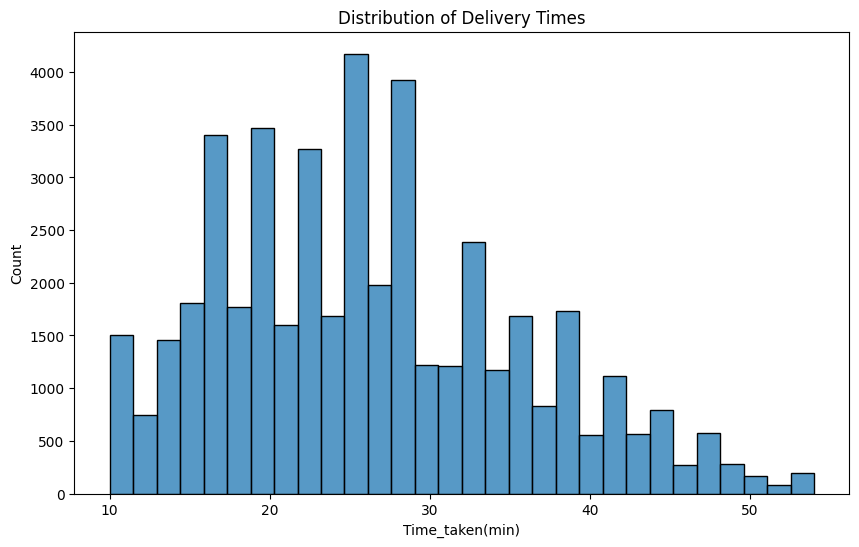

In [ ]:
# Delivery Time 
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Time_taken(min)', bins=30)
plt.title('Distribution of Delivery Times')
plt.show()

<Axes: xlabel='Delivery_person_Ratings', ylabel='Count'>

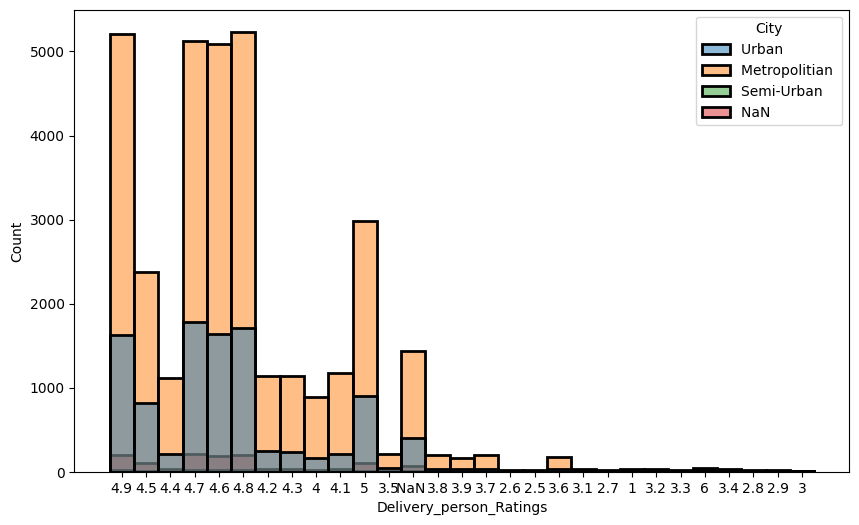

In [215]:
plt.figure(figsize=(10,6))
sns.histplot(x=df.Delivery_person_Ratings,hue=df.City,bins=40,linewidth=2)

In [212]:
# Weather Conditions and Delivery Time

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Weather_Conditions', y='Time_taken(min)')
plt.xticks(rotation=45)
plt.title('Delivery Time by Weather Conditions')
plt.show()


ValueError: Could not interpret value `Weather_Conditions` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>